In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
res = pd.read_csv(os.path.join("results","proteins", "TLL_Prot2", "prod_r1_nojump_prot.xtc_prod_r1_pbc_fit_prot_last.pdb.csv"))
entity_name ="TLL"

In [3]:
labels = [
    f"Method: {row['method']}" + 
    (f", Params: {row['params']}" if row['method'] != "spectral" and row['params'] and len(str(row['params'])) > 5 else '') + 
    (f", Matrix: {row['matrix']}" if pd.notna(row['matrix']) else '') 
    
    for _, row in res.iterrows()
]

labels = [label.replace('nan', '').replace(',nan', '') for label in labels]
res["new_labels"] = labels


In [4]:
# Ensure clustering is stored as an actual NumPy array
res["clustering"] = res["clustering"].apply(lambda x: np.array(x) if isinstance(x, (list, np.ndarray)) else np.fromstring(x[1:-1], sep=" "))

# Compute the number of unique clusters
res["nr_clusters"] = res["clustering"].apply(lambda x: len(np.unique(x)))


res["final_new_label"] = res["new_labels"] + "\n clusters: " + res["nr_clusters"].astype(str)

res["labels"] = res["final_new_label"]

labels = res["labels"]

In [5]:
res

,name,method,params,matrix,clustering,runtime,Q,new_labels,nr_clusters,final_new_label,labels
0,Spectral,spectral,{'cluster_count': 16},delta,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",17.780819,0.272091,"Method: spectral, Matrix: delta",16,"Method: spectral, Matrix: delta\n clusters: 16","Method: spectral, Matrix: delta\n clusters: 16"
1,HDBSCAN,hdbscan,{},delta,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",17.781404,1.145557,"Method: hdbscan, Matrix: delta",3,"Method: hdbscan, Matrix: delta\n clusters: 3","Method: hdbscan, Matrix: delta\n clusters: 3"
2,Affinity,affinity,{},delta,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",17.796142,0.047069,"Method: affinity, Matrix: delta",59,"Method: affinity, Matrix: delta\n clusters: 59","Method: affinity, Matrix: delta\n clusters: 59"
3,Spectral,spectral,{'cluster_count': 16},stddv,"[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, ...",7.958678,0.288518,"Method: spectral, Matrix: stddv",16,"Method: spectral, Matrix: stddv\n clusters: 16","Method: spectral, Matrix: stddv\n clusters: 16"
4,HDBSCAN,hdbscan,{},stddv,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",7.950181,1.145557,"Method: hdbscan, Matrix: stddv",3,"Method: hdbscan, Matrix: stddv\n clusters: 3","Method: hdbscan, Matrix: stddv\n clusters: 3"
5,Affinity,affinity,{},stddv,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",7.984291,0.047404,"Method: affinity, Matrix: stddv",52,"Method: affinity, Matrix: stddv\n clusters: 52","Method: affinity, Matrix: stddv\n clusters: 52"
6,Spectral,spectral,{'cluster_count': 16},delta+1std,"[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...",17.768033,0.270239,"Method: spectral, Matrix: delta+1std",16,"Method: spectral, Matrix: delta+1std\n cluster...","Method: spectral, Matrix: delta+1std\n cluster..."
7,HDBSCAN,hdbscan,{},delta+1std,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",17.772468,1.145557,"Method: hdbscan, Matrix: delta+1std",3,"Method: hdbscan, Matrix: delta+1std\n clusters: 3","Method: hdbscan, Matrix: delta+1std\n clusters: 3"
8,Affinity,affinity,{},delta+1std,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",17.790778,0.047069,"Method: affinity, Matrix: delta+1std",59,"Method: affinity, Matrix: delta+1std\n cluster...","Method: affinity, Matrix: delta+1std\n cluster..."
9,Spectral,spectral,{'cluster_count': 16},delta+2std,"[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...",17.768709,0.293220,"Method: spectral, Matrix: delta+2std",16,"Method: spectral, Matrix: delta+2std\n cluster...","Method: spectral, Matrix: delta+2std\n cluster..."


In [6]:
import ast
nr_of_clusters_fixed = ast.literal_eval(res[res["method"] == "spectral"].iloc[0]["params"])["cluster_count"]

In [7]:
labels

0        Method: spectral, Matrix: delta\n clusters: 16
1          Method: hdbscan, Matrix: delta\n clusters: 3
2        Method: affinity, Matrix: delta\n clusters: 59
3        Method: spectral, Matrix: stddv\n clusters: 16
4          Method: hdbscan, Matrix: stddv\n clusters: 3
5        Method: affinity, Matrix: stddv\n clusters: 52
6     Method: spectral, Matrix: delta+1std\n cluster...
7     Method: hdbscan, Matrix: delta+1std\n clusters: 3
8     Method: affinity, Matrix: delta+1std\n cluster...
9     Method: spectral, Matrix: delta+2std\n cluster...
10    Method: hdbscan, Matrix: delta+2std\n clusters: 3
11    Method: affinity, Matrix: delta+2std\n cluster...
12                       Method: Resicon\n clusters: 16
Name: labels, dtype: object

C:\Users\josef\AppData\Local\Temp\ipykernel_1628\2837420527.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=Q_values, palette="viridis")
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\li

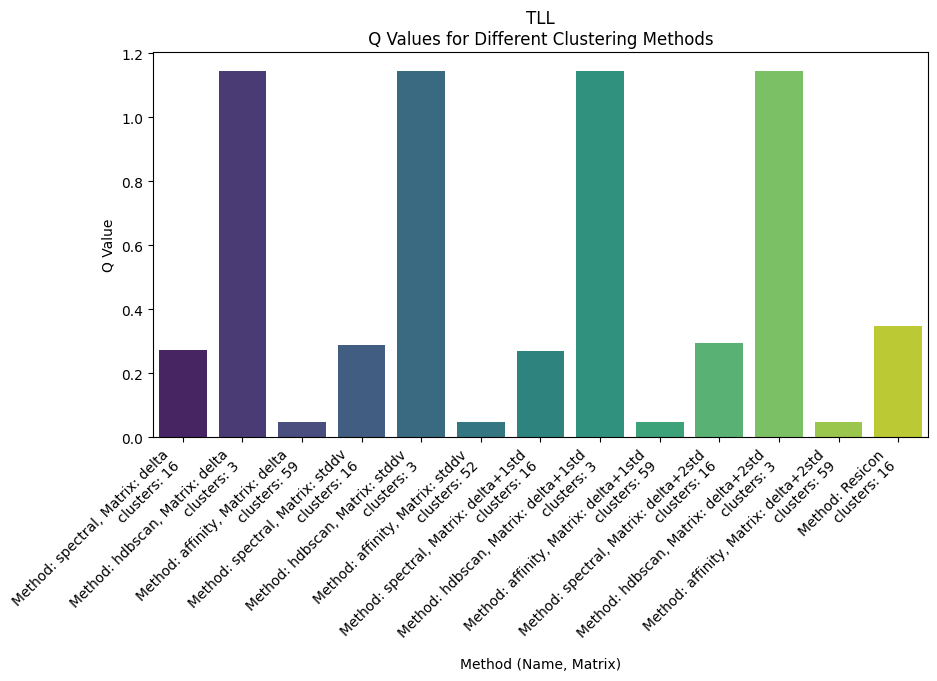

In [8]:
import seaborn as sns
Q_values =  [row['Q'] for _, row in res.iterrows()] 

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=Q_values, palette="viridis")

# Labels and title
plt.xlabel("Method (Name, Matrix)")
plt.ylabel("Q Value")
plt.title(entity_name + "\n Q Values for Different Clustering Methods ")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

C:\Users\josef\AppData\Local\Temp\ipykernel_1628\2697028971.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=Q_values, palette="viridis")
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\li

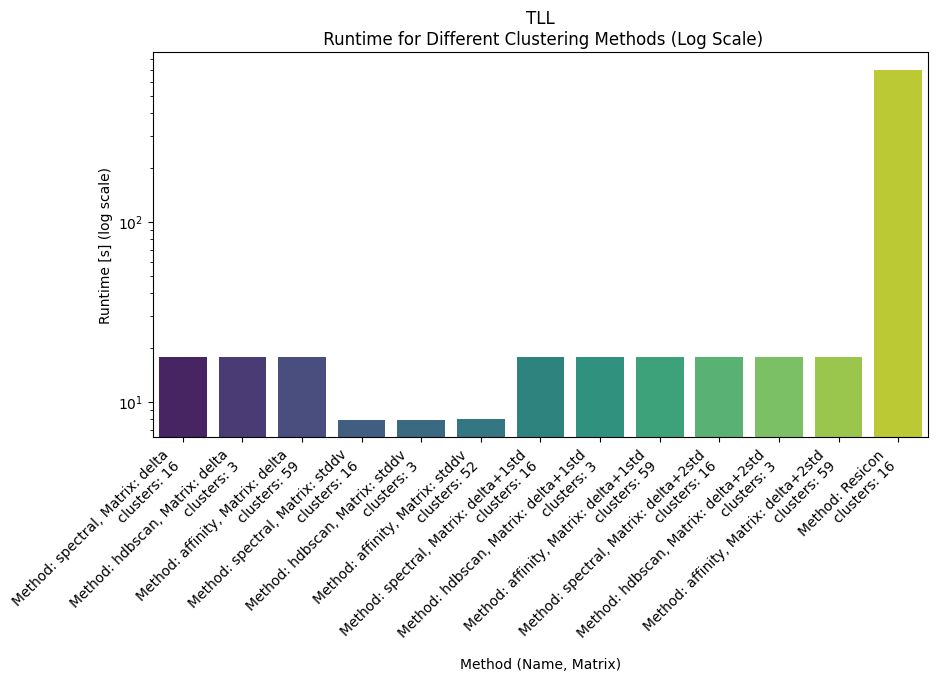

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Q_values = [row['runtime'] for _, row in res.iterrows()]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=labels, y=Q_values, palette="viridis")

# Set log scale for y-axis
plt.yscale('log')

# Labels and title
plt.xlabel("Method (Name, Matrix)")
plt.ylabel("Runtime [s] (log scale)")
plt.title(entity_name + "\n Runtime for Different Clustering Methods (Log Scale)")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


In [10]:
labels

0        Method: spectral, Matrix: delta\n clusters: 16
1          Method: hdbscan, Matrix: delta\n clusters: 3
2        Method: affinity, Matrix: delta\n clusters: 59
3        Method: spectral, Matrix: stddv\n clusters: 16
4          Method: hdbscan, Matrix: stddv\n clusters: 3
5        Method: affinity, Matrix: stddv\n clusters: 52
6     Method: spectral, Matrix: delta+1std\n cluster...
7     Method: hdbscan, Matrix: delta+1std\n clusters: 3
8     Method: affinity, Matrix: delta+1std\n cluster...
9     Method: spectral, Matrix: delta+2std\n cluster...
10    Method: hdbscan, Matrix: delta+2std\n clusters: 3
11    Method: affinity, Matrix: delta+2std\n cluster...
12                       Method: Resicon\n clusters: 16
Name: labels, dtype: object

In [11]:
indices = res[~res["labels"].str.contains("2std", na=False)].index.tolist()

In [12]:
indices

[0, 1, 2, 3, 4, 5, 6, 7, 8, 12]

In [13]:
selected_labels = indices

C:\Users\josef\AppData\Local\Temp\ipykernel_1628\1299203762.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_labels, y=Q_values, palette="viridis")
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_

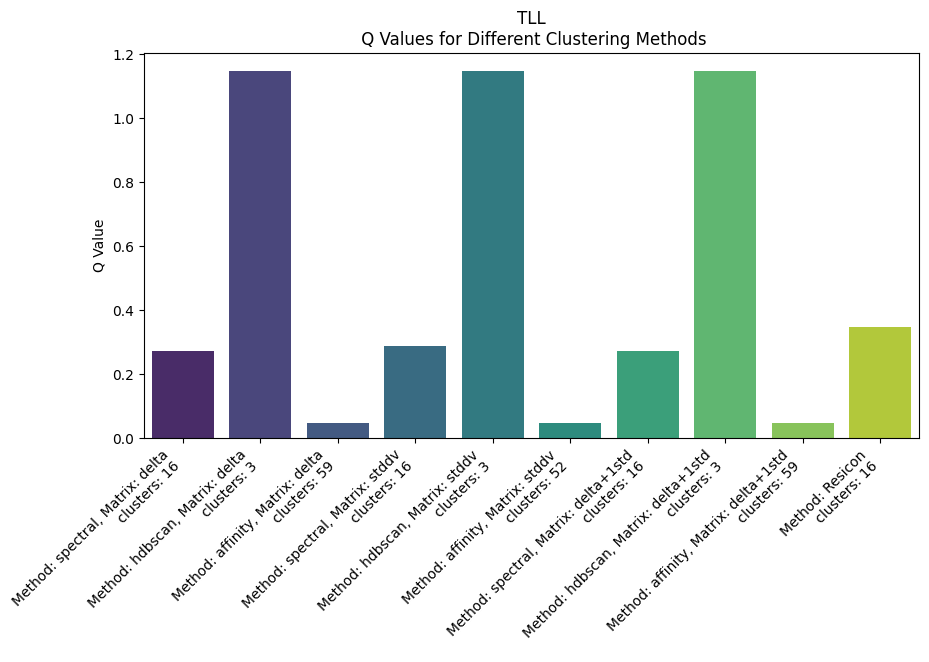

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

Q_values =  np.array([row['Q'] for _, row in res.iterrows()])[selected_labels]
plot_labels = np.array(labels)[selected_labels]

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=plot_labels, y=Q_values, palette="viridis")

# Labels and title
plt.ylabel("Q Value")
plt.title(entity_name + "\n Q Values for Different Clustering Methods")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()

C:\Users\josef\AppData\Local\Temp\ipykernel_1628\1987660556.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_labels, y=Q_values, palette="viridis")
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_39\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\josef\.conda\envs\redpannda_1_

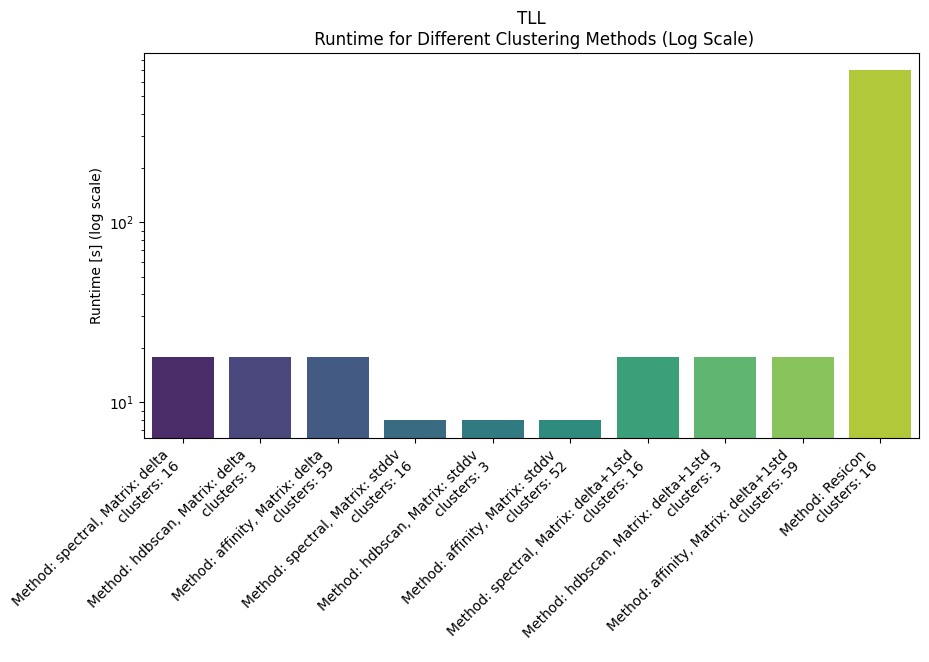

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Assuming `res` is a pandas DataFrame
Q_values = np.array([row['runtime'] for _, row in res.iterrows()])[selected_labels]
plot_labels = np.array(labels)[selected_labels]
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=plot_labels, y=Q_values, palette="viridis")

# Set log scale for y-axis
plt.yscale('log')

# Labels and title
plt.ylabel("Runtime [s] (log scale)")
plt.title(entity_name + "\n Runtime for Different Clustering Methods (Log Scale)")
plt.xticks(rotation=45, ha='right')

# Show plot
plt.show()


In [16]:
res

,name,method,params,matrix,clustering,runtime,Q,new_labels,nr_clusters,final_new_label,labels
0,Spectral,spectral,{'cluster_count': 16},delta,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",17.780819,0.272091,"Method: spectral, Matrix: delta",16,"Method: spectral, Matrix: delta\n clusters: 16","Method: spectral, Matrix: delta\n clusters: 16"
1,HDBSCAN,hdbscan,{},delta,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",17.781404,1.145557,"Method: hdbscan, Matrix: delta",3,"Method: hdbscan, Matrix: delta\n clusters: 3","Method: hdbscan, Matrix: delta\n clusters: 3"
2,Affinity,affinity,{},delta,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",17.796142,0.047069,"Method: affinity, Matrix: delta",59,"Method: affinity, Matrix: delta\n clusters: 59","Method: affinity, Matrix: delta\n clusters: 59"
3,Spectral,spectral,{'cluster_count': 16},stddv,"[7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, ...",7.958678,0.288518,"Method: spectral, Matrix: stddv",16,"Method: spectral, Matrix: stddv\n clusters: 16","Method: spectral, Matrix: stddv\n clusters: 16"
4,HDBSCAN,hdbscan,{},stddv,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",7.950181,1.145557,"Method: hdbscan, Matrix: stddv",3,"Method: hdbscan, Matrix: stddv\n clusters: 3","Method: hdbscan, Matrix: stddv\n clusters: 3"
5,Affinity,affinity,{},stddv,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",7.984291,0.047404,"Method: affinity, Matrix: stddv",52,"Method: affinity, Matrix: stddv\n clusters: 52","Method: affinity, Matrix: stddv\n clusters: 52"
6,Spectral,spectral,{'cluster_count': 16},delta+1std,"[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...",17.768033,0.270239,"Method: spectral, Matrix: delta+1std",16,"Method: spectral, Matrix: delta+1std\n cluster...","Method: spectral, Matrix: delta+1std\n cluster..."
7,HDBSCAN,hdbscan,{},delta+1std,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",17.772468,1.145557,"Method: hdbscan, Matrix: delta+1std",3,"Method: hdbscan, Matrix: delta+1std\n clusters: 3","Method: hdbscan, Matrix: delta+1std\n clusters: 3"
8,Affinity,affinity,{},delta+1std,"[0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",17.790778,0.047069,"Method: affinity, Matrix: delta+1std",59,"Method: affinity, Matrix: delta+1std\n cluster...","Method: affinity, Matrix: delta+1std\n cluster..."
9,Spectral,spectral,{'cluster_count': 16},delta+2std,"[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...",17.768709,0.293220,"Method: spectral, Matrix: delta+2std",16,"Method: spectral, Matrix: delta+2std\n cluster...","Method: spectral, Matrix: delta+2std\n cluster..."
